In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
import os    #For access file
import seaborn as sns    #visualizing data
import keras    #Deep learning library
import sklearn    #Machine learning library
import matplotlib.pyplot as plt    #visualizing data
plt.style.use('seaborn')    #change thema. Settings that are made before remain.
sns.set(font_scale=2.5)


#read data
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submit=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

#check format of train data
train.head()




Using TensorFlow backend.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train.dtypes) #check data type

train.describe() 

test.describe()

train.isnull().sum()/train.shape[0]

train.fillna(0, inplace=True) #fill zero in train data. inplace parameter means save result.

test.fillna(0, inplace=True)

train.describe()


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
from sklearn.model_selection import cross_val_score, train_test_split #For validation, split data.
from sklearn.preprocessing import StandardScaler #For data scaling
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV #For data regression. It makes model simpler.
from sklearn.metrics import mean_squared_error, make_scorer #Cost Function. In this case, I used MSE.
from scipy.stats import skew #For probabilty, like pdf, cdf...
from IPython.display import display #For display cell in HTML format.
import seaborn as sns

corr=train.corr() #check correlation each other.
corr.sort_values(["SalePrice"], ascending=False, inplace=True) #check correlation with SalePrice.
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [5]:
#display list sorted on correlation with SalePrice.
n_train = train.shape[0] #shape[0] means number of categories.
n_test = test.shape[0]
y = train['SalePrice'].values #y means the value of SalePrice
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
data.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.272011,49.565262,0.429599,0.061322,560.579993,23.098321,...,5.564577,6.089072,2.251799,16.062350,6.451524,1051.417266,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.606014,169.179104,0.524676,0.245608,439.590889,64.244246,...,1.113131,1.409947,35.663946,56.184365,1.569379,441.120498,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,...,5.000000,6.000000,0.000000,0.000000,6.000000,989.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.000000,0.000000,...,6.000000,7.000000,0.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,9.000000,10.000000,800.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [6]:
categorical_feature_mask = data.dtypes == object #categorical boolean mask
#filter categorical columns using mask and turn it into a list
categorical_cols=data.columns[categorical_feature_mask].tolist() 


In [7]:
print(categorical_cols)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [8]:
data = pd.get_dummies(data) #Labelling for each category


In [9]:
train = data[:n_train] #train
test=data[n_train:] #test

In [10]:
x_train, x_test, y_train, y_test= train_test_split(train, y, test_size=0.1, random_state=101)

In [11]:
y_train=y_train.reshape(-1,1) #reshape(-1,x) makes data set consists only one column.
y_test = y_test.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()    #StandardScaler makes data to mean 0, dev 1.
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train) #put and transform data
x_test = sc_X.fit_transform(x_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [12]:
lm=LinearRegression() #For regression

In [13]:
lm.fit(x_train,y_train) #run model
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [14]:
print(lm.intercept_) #intercepy means result when x is 0 in f(x).

[9.53601809e-05]


In [15]:
print(lm.coef_)

[[ 5.10038070e+07  5.72023674e+07  1.33847073e-02 -3.64209600e-02
  -2.59092394e+09 -9.24861378e+08  5.84678352e-03 -4.14429605e-03
  -2.48268383e+09  1.52736902e-06  5.10535613e-02  1.84639320e-02
   4.06664908e-02  4.10172082e-02  1.76049508e-02 -6.97348138e+07
   8.02870281e-03  4.11909446e-03 -3.67242508e-02  8.42738375e-02
   5.87082095e-03  6.68891060e+06 -2.25193053e-02  6.01896252e-02
  -4.12086584e-03 -1.49745224e-02  7.93844648e-03  7.82025410e-02
   1.18806014e-01  3.69703501e-01  2.30322839e-02  4.12071827e-02
   2.48171976e+09  2.19076723e-02  1.04764313e-01  2.36744732e-02
  -9.38391685e-03  7.59291336e+10  5.80896136e+10  5.07114307e+10
  -1.55109976e+10 -6.17144785e+09 -7.47383496e+09 -7.21690868e+09
  -1.12405587e+10 -1.04485099e+11 -8.22336185e+10 -9.91248538e+10
  -1.86602134e+10 -1.43889928e+11 -9.86227020e+09 -2.33543146e+10
  -1.85684622e+10 -1.68088391e+10 -3.05186801e+10 -2.73631329e+10
   6.92896660e+09  5.88771251e+09  8.70056182e+09  4.28171714e+09
   5.44060

In [16]:
predictions = lm.predict(x_test)
predictions=predictions.reshape(-1,1)
predictions

array([[-2.03690247e+09],
       [-4.08167847e+10],
       [ 2.71224342e+10],
       [-6.60468230e+10],
       [ 3.59076517e+08],
       [-4.21410647e+10],
       [ 3.83871669e+09],
       [-5.66054742e+10],
       [-1.79840645e+10],
       [ 3.36273770e+09],
       [-5.12067063e+10],
       [-2.68032544e+10],
       [-1.78938841e+10],
       [-1.02822397e+11],
       [ 9.14783799e+10],
       [ 9.19759681e+10],
       [ 2.25650901e+10],
       [-1.80417527e+10],
       [-2.21593803e+10],
       [-1.17255575e+10],
       [-6.16991898e+09],
       [ 2.38811433e+10],
       [-1.26772540e+09],
       [-6.51256062e+09],
       [-8.05329528e+09],
       [-2.32619499e+09],
       [ 1.57735607e+10],
       [ 1.09009670e+10],
       [-2.02261593e+10],
       [ 4.64645728e+09],
       [-1.77300057e+10],
       [-2.21223411e+11],
       [ 1.42253584e+09],
       [ 7.54602062e+10],
       [ 9.06308869e+10],
       [ 1.15245145e+11],
       [-2.93981293e+10],
       [-2.14549477e+10],
       [ 7.9

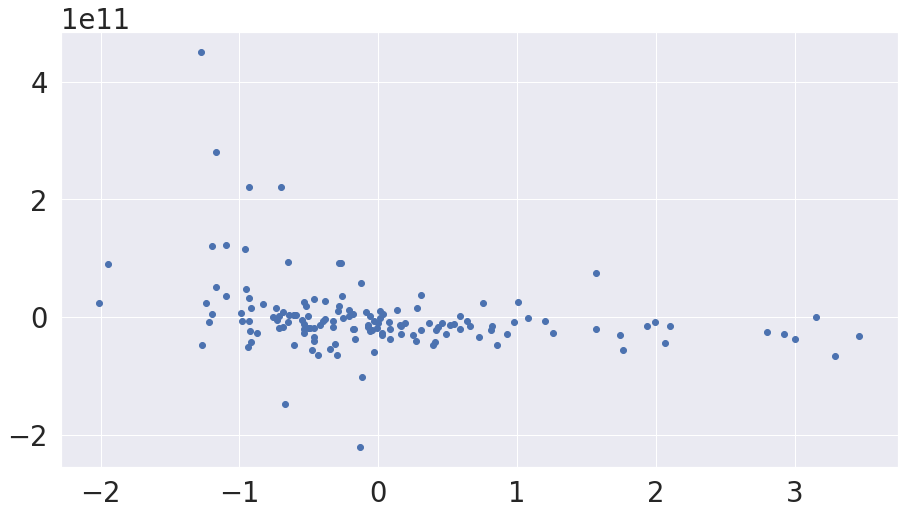

In [17]:
plt.figure(figsize=(15,8)) #visualize
plt.scatter(y_test,predictions)
plt.show()

In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('MAE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 36501728676.455956
MSE: 4.3935976187345633e+21
MAE: 66284218474.19311


In [20]:
from sklearn import ensemble #using ensemble model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
#parameters for running GradientBoostingRegression method
params = {'n_estimators' : 500, 'max_depth' : 4, 'min_samples_split':2, 'learning_rate' : 0.01, 'loss' : 'ls'}
clf=ensemble.GradientBoostingRegressor(**params)
clf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
clf_pred = clf.predict(x_test)
clf_pred=clf_pred.reshape(-1,1)

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.2144783208623322
MSE: 0.11147284825675179
RMSE: 0.33387549813778156


In [23]:
a= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_id=a['Id']
a=pd.DataFrame(test_id, columns=['Id'])

In [24]:
test = sc_X.fit_transform(test)

In [25]:
test_predictions_clf=clf.predict(test)
test_predictions_clf= test_predictions_clf.reshape(-1,1)

In [26]:
test_predictions_clf=sc_y.inverse_transform(test_predictions_clf)

In [27]:
test_pred_clf = pd.DataFrame(test_predictions_clf, columns=['SalePrice'])

In [28]:
test_pred_clf.head()

,SalePrice
0,134856.781389
1,160405.088660
2,177414.608556
3,183121.071237
4,198698.827363


In [29]:
result=pd.concat([a, test_pred_clf], axis=1)
result.head()

,Id,SalePrice
0,1461,134856.781389
1,1462,160405.088660
2,1463,177414.608556
3,1464,183121.071237
4,1465,198698.827363


In [30]:
result.to_csv('submission.csv', index=False)